In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("airline_tweets.csv")

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


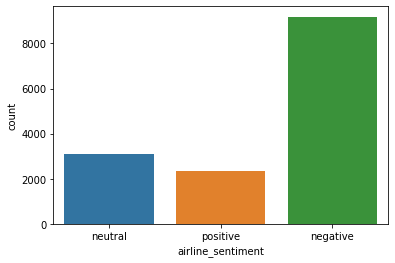

In [ ]:
sns.countplot(data=df,x='airline_sentiment')

In [ ]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

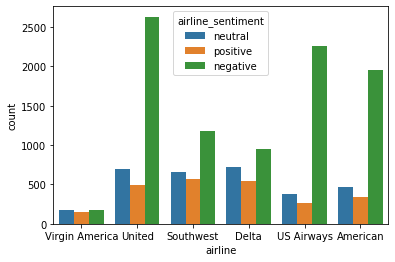

In [ ]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

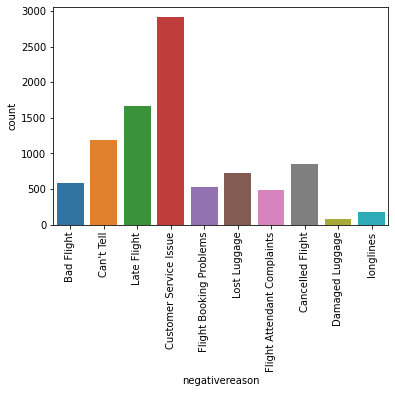

In [ ]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

In [ ]:
data = df[['airline_sentiment','text']]
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
data.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [ ]:
df['text'].str.isspace().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
y = df['airline_sentiment']
X = df['text']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

NB MODEL
              precision    recall  f1-score   support

    negative       0.69      0.99      0.82      1896
     neutral       0.80      0.16      0.27       599
    positive       0.90      0.18      0.30       433

    accuracy                           0.70      2928
   macro avg       0.80      0.45      0.46      2928
weighted avg       0.75      0.70      0.63      2928



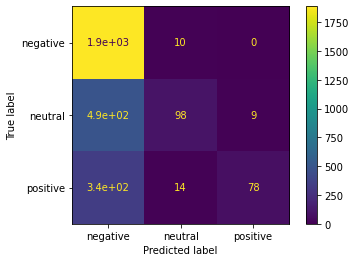

In [ ]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1896
     neutral       0.66      0.47      0.55       599
    positive       0.80      0.62      0.70       433

    accuracy                           0.79      2928
   macro avg       0.76      0.67      0.71      2928
weighted avg       0.78      0.79      0.78      2928



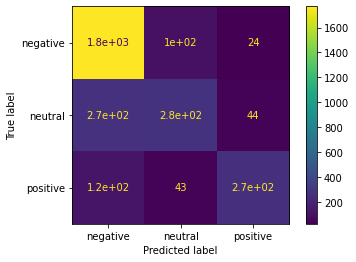

In [ ]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

    negative       0.84      0.90      0.87      1896
     neutral       0.61      0.53      0.57       599
    positive       0.76      0.69      0.72       433

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.78      0.79      0.78      2928



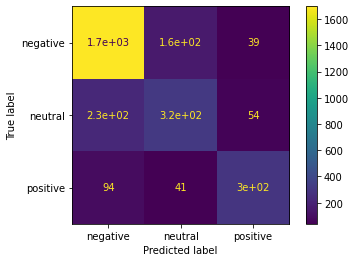

In [ ]:
print('SVC')
report(svc)